# Kelompok 2 C1'20
-----------------------
##### - Didi Nur Rahmad
##### - Olivia Oktavi Utami
##### - Rizki Andryanti

## 1. Import Library

In [88]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
import numpy as np



## 2. Membaca Dataset

In [12]:
train = r'Datasets/furniture-images/img/train'
val = r'Datasets/furniture-images/img/val'
test = r'Datasets/furniture-images/img/test'

## 3. Visualisasi
##### Memvisualisasikan dataset dengan PIE Chart

In [118]:
root_path = r'Datasets'
source_train = os.path.join(root_path, 'furniture-images/img/train')
source_val = os.path.join(root_path, 'furniture-images/img/val')
source_test = os.path.join(root_path, 'furniture-images/img/test')

dataset_train = {}
dataset_val = {}
dataset_test = {}
for label in os.listdir(source_train):
    dataset_train[label] = [file for file in os.listdir(
        os.path.join(source_train, label))]

for label in os.listdir(source_val):
    dataset_val[label] = [file for file in os.listdir(
        os.path.join(source_val, label))]

for label in os.listdir(source_test):
    dataset_test[label] = [file for file in os.listdir(
        os.path.join(source_test, label))]

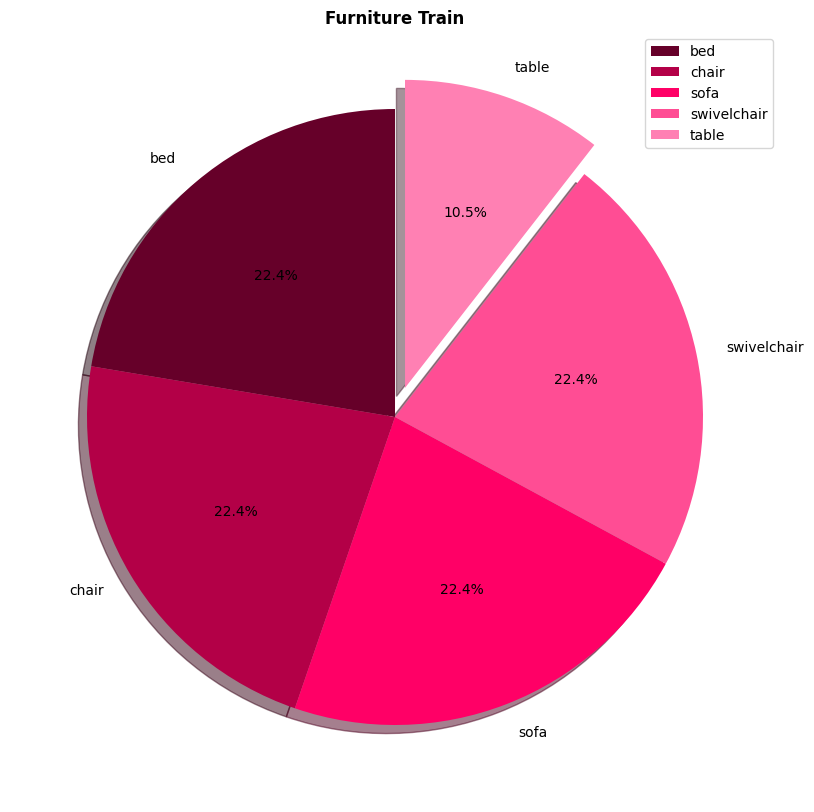

In [124]:
plt.figure(figsize=(10, 10))
plt.pie([len(files) for files in dataset_train.values()],
        labels=dataset_train.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0.1],
        shadow=True,
        colors=['#660029', '#b30047', '#ff0066', '#ff4d94', '#ff80b3'])
plt.title('Furniture Train', fontweight='bold')
plt.legend()
plt.show()

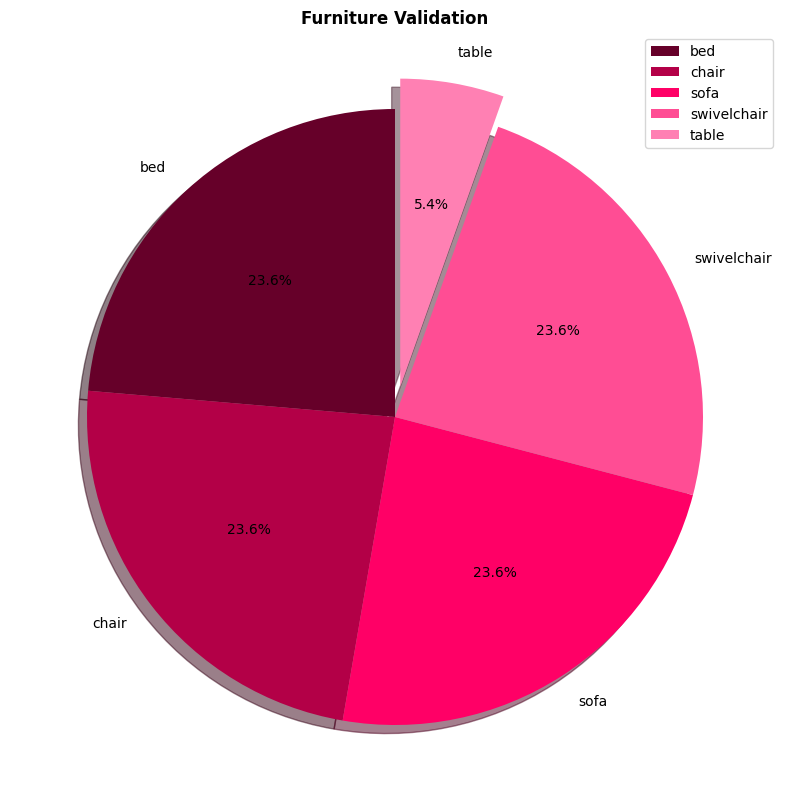

In [121]:
plt.figure(figsize=(10, 10))
plt.pie([len(files) for files in dataset_val.values()],
        labels=dataset_val.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0.1],
        shadow=True,
        colors=['#660029', '#b30047', '#ff0066', '#ff4d94', '#ff80b3'])
plt.title('Furniture Validation', fontweight='bold')
plt.legend()
plt.show()

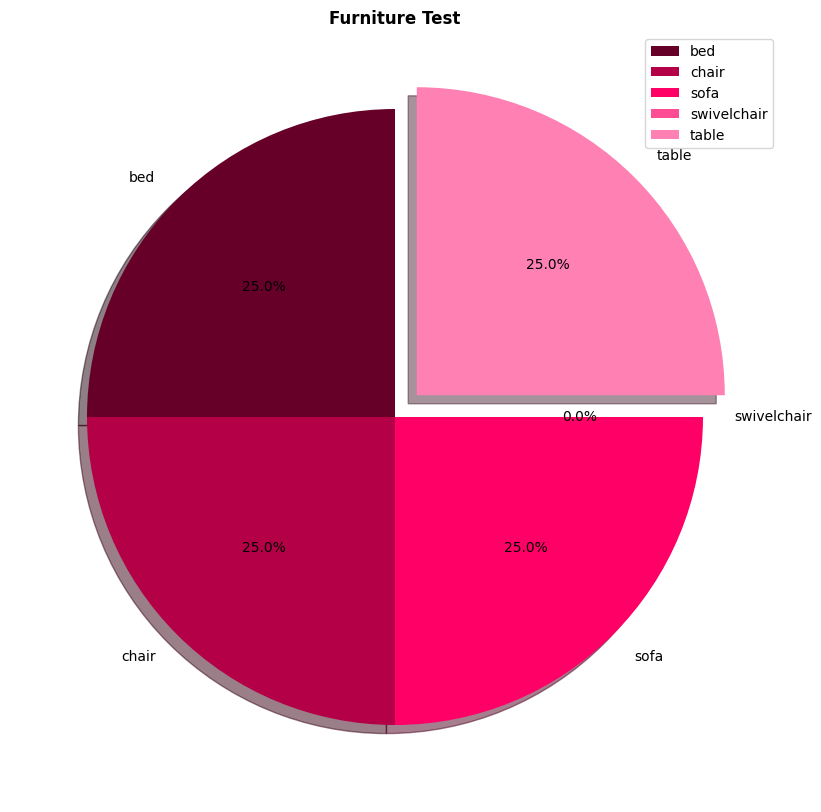

In [123]:
plt.figure(figsize=(10, 10))
plt.pie([len(files) for files in dataset_test.values()],
        labels=dataset_test.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0.1],
        shadow=True,
        colors=['#660029', '#b30047', '#ff0066', '#ff4d94', '#ff80b3'])
plt.title('Furniture Test', fontweight='bold')
plt.legend()
plt.show()

## 4. Augmentation

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # horizontal_flip = True,
    rotation_range= 30,
    # shear_range=.2,
    zoom_range=.2,
    # fill_mode='nearest'
    )
train_generator = train_datagen.flow_from_directory(
    train,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

Found 4024 images belonging to 5 classes.
Found 160 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [62]:
image, lable = test_generator.next()

In [79]:
train_x, y_train = train_generator.next()
print(train_x.shape)

(64, 150, 150, 3)


In [81]:
train_generator.class_indices

{'bed': 0, 'chair': 1, 'sofa': 2, 'swivelchair': 3, 'table': 4}

#### Sample Image

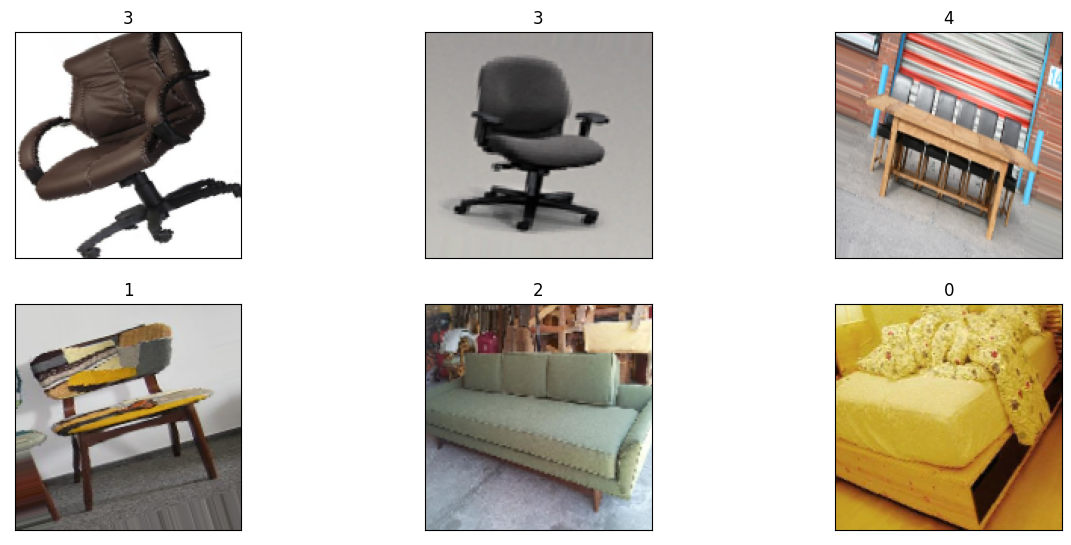

In [91]:
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_x[i])
    plt.title(np.argmax(y_train[i]))



## 5. Membuat Model

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
   

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 32)     

In [108]:
# from tensorflow.keras.optimizers import RMSprop
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## Melatih Model

In [109]:
# latih model dengan model.fit
hasil = model.fit(train_generator,validation_data = val_generator, epochs=15)


Epoch 1/15
63/63 [==============================] - 35s 547ms/step - loss: 1.3084 - accuracy: 0.4600 - val_loss: 0.9607 - val_accuracy: 0.6454
Epoch 2/15
63/63 [==============================] - 35s 551ms/step - loss: 0.9304 - accuracy: 0.6553 - val_loss: 0.7872 - val_accuracy: 0.7210
Epoch 3/15
63/63 [==============================] - 34s 543ms/step - loss: 0.8191 - accuracy: 0.6996 - val_loss: 0.6383 - val_accuracy: 0.7660
Epoch 4/15
63/63 [==============================] - 34s 546ms/step - loss: 0.7467 - accuracy: 0.7234 - val_loss: 0.5663 - val_accuracy: 0.8038
Epoch 5/15
63/63 [==============================] - 36s 567ms/step - loss: 0.6808 - accuracy: 0.7604 - val_loss: 0.5635 - val_accuracy: 0.8014
Epoch 6/15
63/63 [==============================] - 34s 545ms/step - loss: 0.6318 - accuracy: 0.7734 - val_loss: 0.5319 - val_accuracy: 0.7991
Epoch 7/15
63/63 [==============================] - 34s 544ms/step - loss: 0.6063 - accuracy: 0.7850 - val_loss: 0.5251 - val_accuracy: 0.7943

## Visualisasi Hasil Training

In [110]:
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']

#validation                                 
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

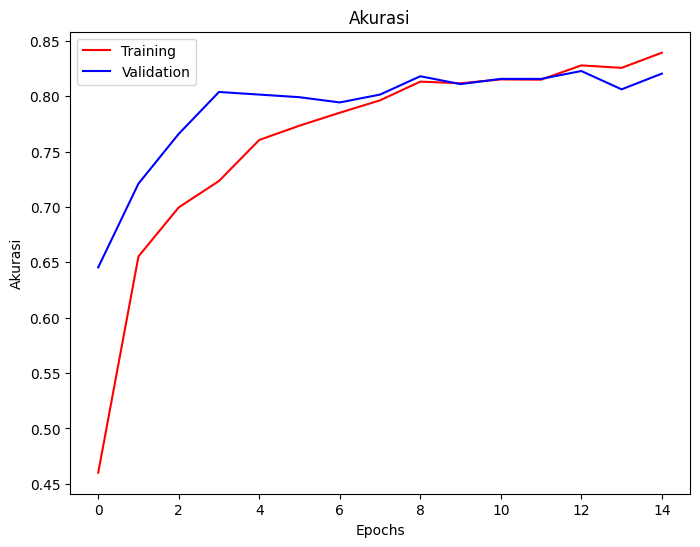

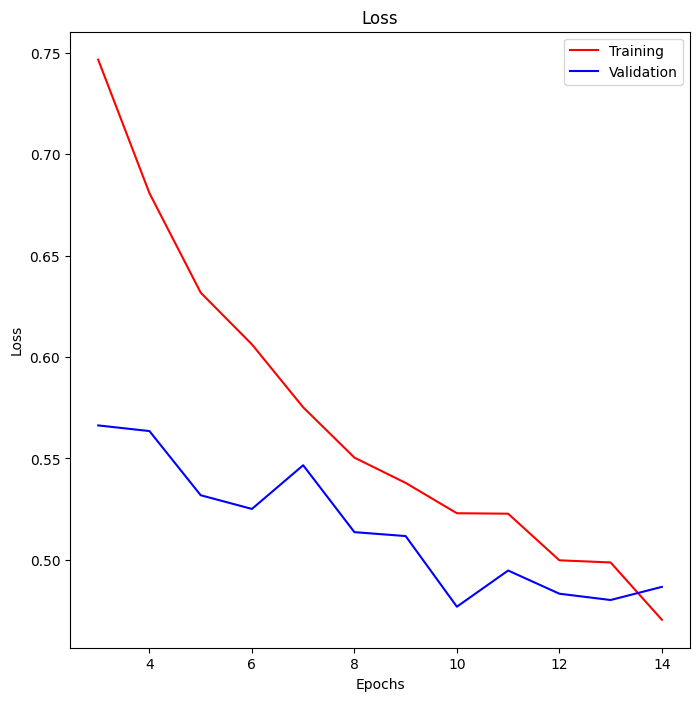

In [111]:
plt.figure(1, figsize=(8,6))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(8,8))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate

In [112]:
model_evaluate = model.evaluate(test_generator, verbose= 0)
print(f'Test loss     : {model_evaluate[0]}')
print(f'Test accuracy : {model_evaluate[1]}')

Test loss     : 0.4438514709472656
Test accuracy : 0.8374999761581421


In [ ]:
class_names = ['bed', 'chair', 'sofa', 'swivelchair', 'table']

## Prediksi dari test data

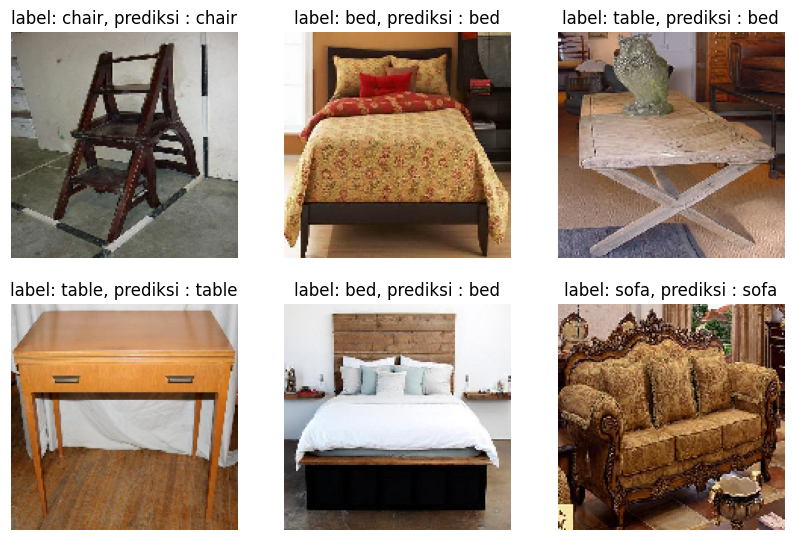

In [116]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(10,10))
for i in range(6) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, prediksi : {class_names[y_pred]}')
